In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg' 

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plotRoc (cv, classifier, X, y, name = None):
    import pylab as pl
    from scipy import interp
    from sklearn.metrics import roc_curve, auc




    ###############################################################################
    # Classification and ROC analysis
    if not name: 
        name = str(classifier).split('(')[0]
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    
    data = []

    for i, (train, test) in enumerate(cv):
        print "#### ITERATION", i, "train ####"
        X_train = X[train]
        
        print "#### ITERATION", i, "test ####"
        X_test = X[test]
        
        probas_ = classifier.fit(X_train, y[train]).predict_proba(X_test)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
        data.append({"x": fpr,
                     "y": tpr,
                     "type": "scatter",
                     "mode": "lines+markers",
                     "name": "Fold %s: %0.2f"%(i, roc_auc),
                     "line": {"dash" :"dot",
                              "width" :1},
                     "opacity": 0.5})
        
    pl.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    data.append({"x": [0, 1],
                 "y": [0, 1],
                 "type": "scatter",
                 "mode": "lines",
                 "name": "Luck",
                 "line": {"dash" :"dash",
                          "width" :2,
                          "color" :"grey"}})
    
    mean_tpr /= len(cv)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    pl.plot(mean_fpr, mean_tpr, 'k--',
            label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)


    data.insert(0,{"x": mean_fpr,
                   "y": mean_tpr,
                   "type": "scatter",
                   "mode": "lines",
                   "name": "%s AUC: %0.2f"%(name, mean_auc),
                   "line": {"dash": "dash",
                            "width": 4,
                            "color": "black"}})

    pl.xlim([-0.05, 1.05])
    pl.ylim([-0.05, 1.05])
    pl.xlabel('False Positive Rate')
    pl.ylabel('True Positive Rate')
    pl.title('Receiver operating characteristic example')
    pl.legend(loc="lower right")
    pl.show()

#     plot(data)
    return data

In [3]:
import pandas as pd
X = pd.read_csv("train_set.csv")
y = pd.read_csv("train_label.csv")

In [ ]:
pca = PCA(n_components=2)
>>> pca.fit(X)
PCA(copy=True, n_components=2, whiten=False)
>>> print(pca.explained_variance_ratio_) 

In [4]:
from sklearn.cross_validation import *
from sklearn.svm import *
kf = KFold(len(y), shuffle=True)
sv = SVC(kernel = "linear", probability=True, random_state=0)

#### ITERATION 0 train ####
#### ITERATION 0 test ####
#### ITERATION

/Users/James/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:472: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
/Users/James/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:472: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


 1 train ####
#### ITERATION 1 test ####
#### ITERATION 2 train ####
#### ITERATION 2 test ####


/Users/James/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:472: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


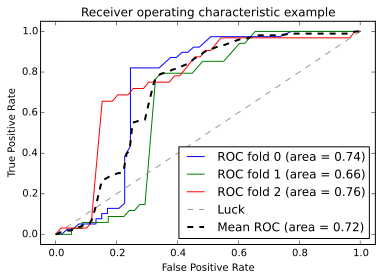

In [5]:
data = plotRoc(kf, sv, X.values, y.values)

In [6]:
cd ..

/Users/James/Documents/MB Lasso/Analysis


In [7]:
labels = pd.read_csv('sm-labeled.csv', index_col=0)

In [8]:
matrix = pd.read_csv('expression-all-labeled-transposed.csv', index_col=0)

In [9]:
matrix.shape, labels.shape

((276, 12405), (276, 10))

In [34]:
labels['y_WNT'] = labels.subtype_original\
        .replace("WNT", 1)\
        .replace("Group 3", 0)\
        .replace("SHH", 0)\
        .replace("Group 4", 0)
labels['y_SHH'] = labels.subtype_original\
        .replace("WNT", 0)\
        .replace("Group 3", 0)\
        .replace("SHH", 1)\
        .replace("Group 4", 0)
labels['y_G3'] = labels.subtype_original\
        .replace("WNT", 0)\
        .replace("Group 3", 1)\
        .replace("SHH", 0)\
        .replace("Group 4", 0)
labels['y_G4'] = labels.subtype_original\
        .replace("WNT", 0)\
        .replace("Group 3", 0)\
        .replace("SHH", 0)\
        .replace("Group 4", 1)
labels['y_c1'] = labels.cluster.replace(1,1).replace(2,0).replace(3,0).replace(4,0)
labels['y_c2'] = labels.cluster.replace(1,0).replace(2,1).replace(3,0).replace(4,0)
labels['y_c3'] = labels.cluster.replace(1,0).replace(2,0).replace(3,1).replace(4,0)
labels['y_c4'] = labels.cluster.replace(1,0).replace(2,0).replace(3,0).replace(4,1)

In [11]:
tsne = labels[["1", "2"]]

In [12]:
for clust in "y_c1", "y_c2", "y_c3", "y_c4":
    for orig in "y_SHH", "y_WNT", "y_G3", "y_G4":
        print clust, orig, labels[clust].corr(labels[orig])

y_c1 y_SHH -0.104024734218
y_c1 y_WNT 0.718695908595
y_c1 y_G3 -0.103034177221
y_c1 y_G4 -0.32581844391
y_c2 y_SHH -0.317994309479
y_c2 y_WNT -0.20073230979
y_c2 y_G3 0.711914880617
y_c2 y_G4 -0.174332420715
y_c3 y_SHH 0.870912244612
y_c3 y_WNT -0.235947468794
y_c3 y_G3 -0.283410334287
y_c3 y_G4 -0.427493327553
y_c4 y_SHH -0.456313406699
y_c4 y_WNT -0.225940151923
y_c4 y_G3 -0.259892490817
y_c4 y_G4 0.836544374764


In [24]:
kf = KFold(len(labels.index), shuffle=True, n_folds=3)
sv = SVC(kernel = "linear", probability=True, random_state=0)

#### ITERATION 0 train ####
#### ITERATION 0 test ####
#### ITERATION 1 train ####
#### ITERATION 1 test ####
#### ITERATION 2 train ####
#### ITERATION 2 test ####


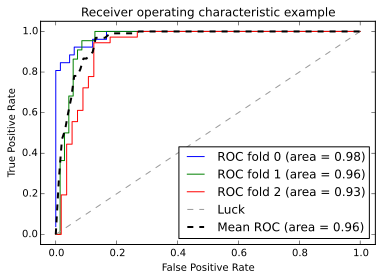

In [36]:
data = plotRoc(kf, sv, tsne.values, labels.y_SHH.values)

#### ITERATION 0 train ####
#### ITERATION 0 test ####
#### ITERATION 1 train ####
#### ITERATION 1 test ####
#### ITERATION 2 train ####
#### ITERATION 2 test ####


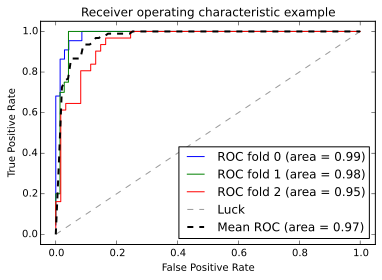

In [26]:
data = plotRoc(kf, sv, tsne.values, labels.y_c3.values)

#### ITERATION 0 train ####
#### ITERATION 0 test ####
#### ITERATION 1 train ####
#### ITERATION 1 test ####
#### ITERATION 2 train ####
#### ITERATION 2 test ####


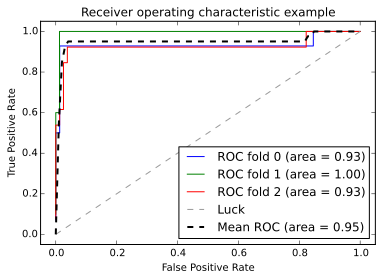

In [27]:
data = plotRoc(kf, sv, tsne.values, labels.y_WNT.values)

#### ITERATION 0 train ####
#### ITERATION 0 test ####
#### ITERATION 1 train ####
#### ITERATION 1 test ####
#### ITERATION 2 train ####
#### ITERATION 2 test ####


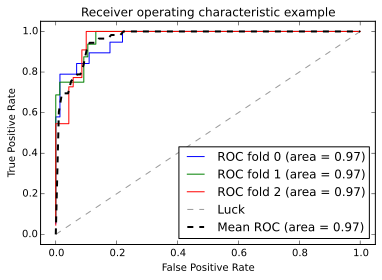

In [28]:
data = plotRoc(kf, sv, tsne.values, labels.y_c1.values)

#### ITERATION 0 train ####
#### ITERATION 0 test ####
#### ITERATION 1 train ####
#### ITERATION 1 test ####
#### ITERATION 2 train ####
#### ITERATION 2 test ####


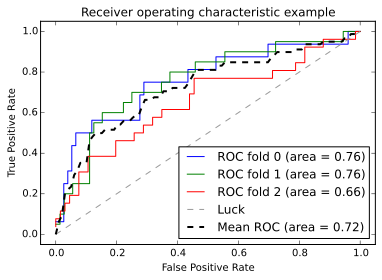

In [33]:
data = plotRoc(kf, sv, tsne.values, labels.y_G3.values)

#### ITERATION 0 train ####
#### ITERATION 0 test ####
#### ITERATION 1 train ####
#### ITERATION 1 test ####
#### ITERATION 2 train ####
#### ITERATION 2 test ####


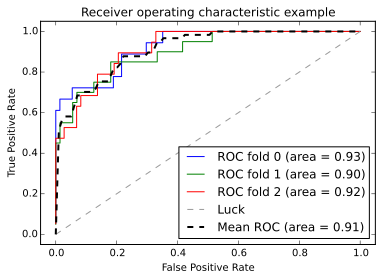

In [29]:
data = plotRoc(kf, sv, tsne.values, labels.y_c2.values)

In [30]:
sum(labels.y_c2.values), sum(labels.y_G3.values)

(57, 62)

#### ITERATION 0 train ####
#### ITERATION 0 test ####
#### ITERATION 1 train ####
#### ITERATION 1 test ####
#### ITERATION 2 train ####
#### ITERATION 2 test ####


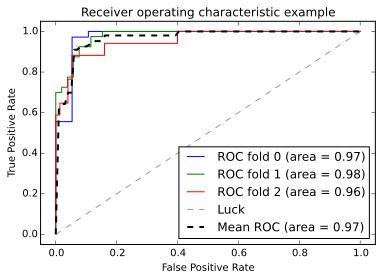

In [31]:
data = plotRoc(kf, sv, tsne.values, labels.y_G4.values)

#### ITERATION 0 train ####
#### ITERATION 0 test ####
#### ITERATION 1 train ####
#### ITERATION 1 test ####
#### ITERATION 2 train ####
#### ITERATION 2 test ####


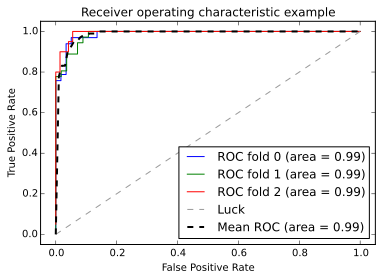

In [32]:
data = plotRoc(kf, sv, tsne.values, labels.y_c4.values)

In [38]:
matrix.shape

(276, 12405)